# Email Spam Detection System
## Dataset Description

- **text** – Includes bunch of emails (some spam, some not). Each email has useful info we can use to teach the system.
- **spam** – Label to particular email (1- Spam, 0 – Not spam)
    
    - 1: unreliable (spam)
    - 0: reliable (not spam)

### Process (Step-by-step analysis)
1. Importing the dataset
2. Independent and Dependent feartures
3. Cleaning the data 
    i) Stemming 
    ii) Stopwords
4. Dividing the data into chunks
5. Model creation 
6. Train-test split the data
7. Apply SMOTE to deal with data imbalance
8. Fit the data
9. Prediction of the dataset
10. Performance metrics and Accuracy score.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-detection-dataset/emails.csv


In [2]:
df = pd.read_csv("/kaggle/input/spam-detection-dataset/emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
#Find the null values
df.isnull().sum()

text    0
spam    0
dtype: int64

There are no null values in the dataset. So, we proceed to the next step

In [5]:
#Independent (input) Features
X = df['text']
X.head()

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

In [6]:
#Output Labels
y = df['spam']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [7]:
y.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

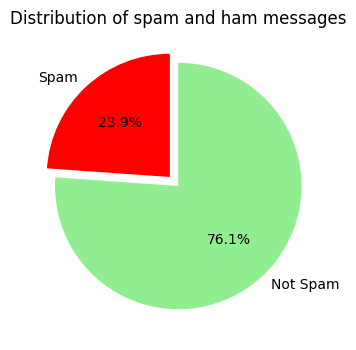

In [8]:
spam = df[df['spam']==1].shape[0]
not_spam = df[df['spam']==0].shape[0]

#Parameters for pie chart
sizes = [spam, not_spam]
labels = ['Spam','Not Spam']
colors = ['red','lightgreen']
explode = (0.1,0)
autopct = '%1.1f%%'

# Dataset Visualization
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.pie(sizes,explode=explode, labels=labels,colors=colors,
        autopct=autopct,startangle=90)
plt.title("Distribution of spam and ham messages")
plt.show()

There are `4360` non-spam emails, and `1368` spam emails in the dataset.

In [9]:
X.shape,y.shape

((5728,), (5728,))

In [10]:
import re #regular expresssion to substitute punctuations, and unnecessary symbols
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [24]:
# nltk.download('wordnet')

In [25]:
# from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
# lemm = WordNetLemmatizer()
# messages.reset_index(inplace=True)

corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z0-9]', ' ', X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = [lemm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Text(0.5, 1.0, 'Word Cloud of most frequent words')

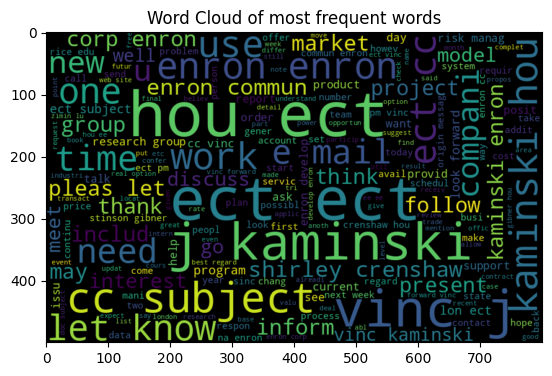

In [27]:
from wordcloud import WordCloud

#Converting the corpus list into a string variable
all_words = " ".join([text for text in corpus])

#Generating a wordcloud to visulaize the occurence of most used words
wordcloud = WordCloud(width=800, height=500, random_state=35, max_font_size=100).generate(all_words)

#Displaying the word cloud using matplotlib
# plt.figure(figsize=(6,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of most frequent words")

In [28]:
#Calculating the length of each document in the corpus
lengthh = []
for i in range(len(corpus)):
    len_ = corpus[i].split(" ")
    length = len(len_)
    lengthh.append(length)

#Printing max length of a document
print(np.max(lengthh))

4331


## 4. Models
### $4a)$ Import necessary dependencies for model creation

In [11]:
# Import modules for data manipulation, and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import modules for data processing,oversampling, and machine learning
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### $4b)$ Initialize and fit Count Vectorizer and TF-IDF Vectorizer

In [12]:
# Specify dataset file path
dataset_file = '/kaggle/input/spam-detection-dataset/emails.csv'

# Set the chunk size
chunk_size = 1000

# Initialize CountVectorizer and Tf-IDF Vectorizer
cbow = CountVectorizer(binary=True, ngram_range=(1, 2))
tfidf = TfidfVectorizer(binary=True, ngram_range=(1, 2))

df = pd.read_csv(dataset_file)

# Fit CountVectorizer and Tf-IDF Vectorizer on the entire dataset
X_cbow = cbow.fit_transform(df['text']).toarray()
X_tfidf = tfidf.fit_transform(df['text']).toarray()

### $4.1$ Train-test split with SMOTE oversampling, `Bag of words` vectorizer and `Logistic Regression` classifier.

In [13]:
# Initialize the model
model = LogisticRegression()

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Read the dataset in chunks
chunks = pd.read_csv(dataset_file, chunksize=chunk_size)

# Iterate over chunks
for chunk in chunks:
    # Shuffle the current chunk
    chunk = chunk.sample(frac=1) #frac=1 means all rows will be shuffled

    # Apply CountVectorizer on the current chunk using the fitted vectorizer
    X_cbow_chunk = cbow.transform(chunk['text']).toarray()

    # Split the chunk into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cbow_chunk, chunk['spam'], test_size=0.3, random_state=68)
    print(len(y_test))
    # Check the distribution of classes in y_train
    # print(pd.Series(y_train).value_counts())
    
    # Apply SMOTE only if there are more than one class in y_train
    if len(set(y_train)) > 1:
        
        # Check the distribution of classes in y_train
        print(pd.Series(y_train).value_counts())
        
        # Apply SMOTE oversampling
        sm = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

        # Train the model on the current chunk with oversampled data
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate and store the results
        result_chunk = pd.DataFrame({
            'true_label': y_test,
            'predicted_label': y_pred
        })
        result_df = pd.concat([result_df, result_chunk], ignore_index=True)    

300
300
spam
0    445
1    255
Name: count, dtype: int64
300
300
300
219


In [14]:
result_df.head()

,true_label,predicted_label
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
#ACCURACY SCORE
print("Accuracy Score for Bag of Words Vectorizer and Logistic Regression classifier:", accuracy_score(result_df['true_label'], result_df['predicted_label']))

Accuracy Score for Bag of Words Vectorizer and Logistic Regression classifier: 0.9366666666666666


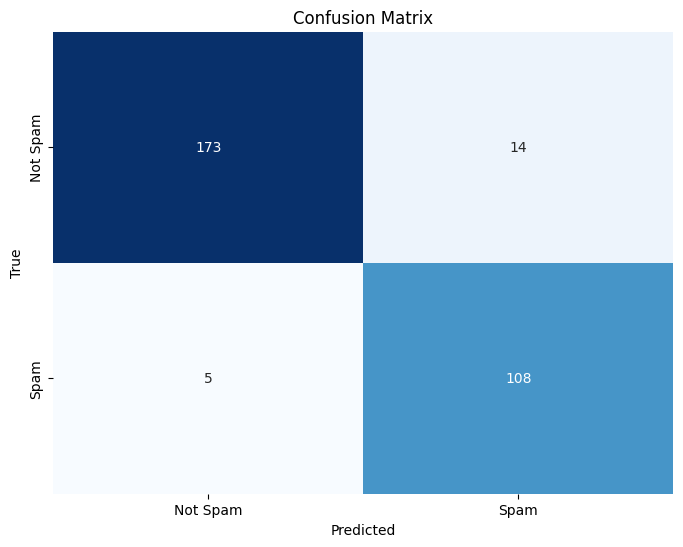

In [16]:
#CONFUSION MATRIX
cm = confusion_matrix(result_df['true_label'], result_df['predicted_label'])

# Evaluate overall performance
# print("Confusion Matrix:\n",cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       187
           1       0.89      0.96      0.92       113

    accuracy                           0.94       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.94      0.94       300



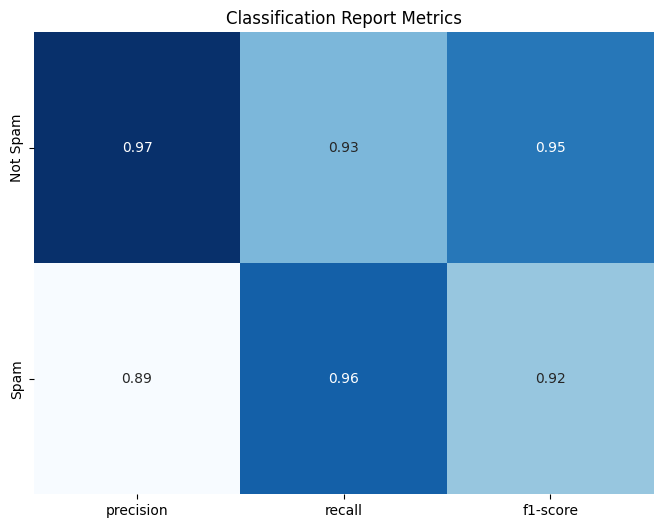

In [17]:
#CLASSIFICATION REPORT
print(classification_report(result_df['true_label'], result_df['predicted_label']))

# Also, replace target_names with the actual class names in your dataset
target_names = ['Not Spam', 'Spam']

# Example classification report
report = classification_report(result_df['true_label'], result_df['predicted_label'], target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame for visualization
df_report = pd.DataFrame(report).transpose()

# Exclude 'weighted avg' and 'macro avg' rows
df_report = df_report[~df_report.index.isin(['weighted avg', 'macro avg', 'accuracy'])]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Metrics')
plt.show()


### $4.2$ Train-test split with SMOTE oversampling, `TF-IDF` vectorizer and `Logistic Regression classifier`.

In [18]:
# Initialize the model
model = LogisticRegression()

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Read the dataset in chunks
chunks = pd.read_csv(dataset_file, chunksize=chunk_size)

# Iterate over chunks
for chunk in chunks:
    # Shuffle the current chunk
    chunk = chunk.sample(frac=1)

    # Apply TF-IDF Vectorizer on the current chunk using the fitted vectorizer
    X_tfidf_chunk = tfidf.transform(chunk['text']).toarray()

    # Split the chunk into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf_chunk, chunk['spam'], test_size=0.3, random_state=68)

    # Check the distribution of classes in y_train
    print(pd.Series(y_train).value_counts())

    # Apply SMOTE only if there are more than one class in y_train
    if len(set(y_train)) > 1:
        # Apply SMOTE oversampling
        sm = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

        # Train the model on the current chunk with oversampled data
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate and store the results
        result_chunk = pd.DataFrame({
            'true_label': y_test,
            'predicted_label': y_pred
        })
        result_df = pd.concat([result_df, result_chunk], ignore_index=True)

spam
1    700
Name: count, dtype: int64
spam
0    435
1    265
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    509
Name: count, dtype: int64


In [19]:
#ACCURACY SCORE
print("Accuracy Score for TF-IDF Vectorizer and Logistic Regression classifier:", accuracy_score(result_df['true_label'], result_df['predicted_label']))

Accuracy Score for TF-IDF Vectorizer and Logistic Regression classifier: 0.9533333333333334


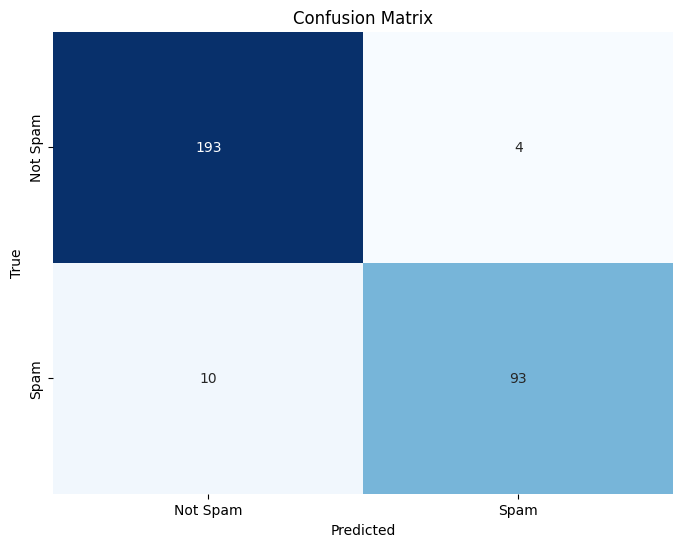

In [20]:
#CONFUSION MATRIX
cm = confusion_matrix(result_df['true_label'], result_df['predicted_label'])

# Evaluate overall performance
# print("Confusion Matrix:\n",cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       197
           1       0.96      0.90      0.93       103

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



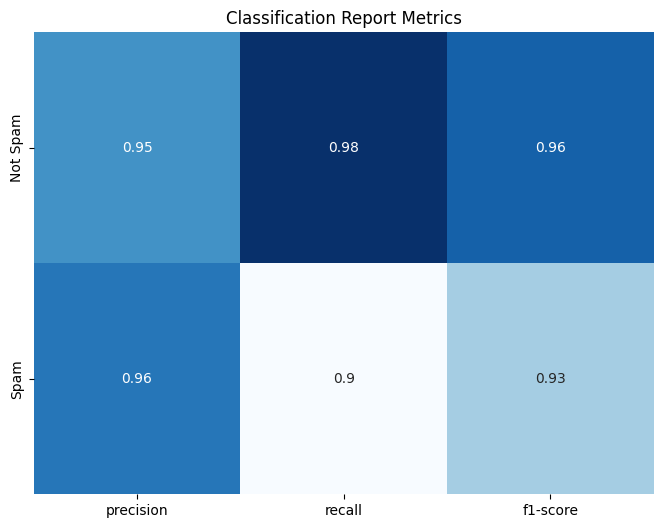

In [21]:
#CLASSIFICATION REPORT
print(classification_report(result_df['true_label'], result_df['predicted_label']))

# Also, replace target_names with the actual class names in your dataset
target_names = ['Not Spam', 'Spam']

# Example classification report
report = classification_report(result_df['true_label'], result_df['predicted_label'], target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame for visualization
df_report = pd.DataFrame(report).transpose()

# Exclude 'weighted avg' and 'macro avg' rows
df_report = df_report[~df_report.index.isin(['weighted avg', 'macro avg', 'accuracy'])]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Metrics')
plt.show()


### $4.3$ Train-test split with SMOTE oversampling, `Bag of words` vectorizer and `Multinomial Naive Bayes` classifier.


In [22]:
# Initialize the model
model = MultinomialNB()

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Read the dataset in chunks
chunks = pd.read_csv(dataset_file, chunksize=chunk_size)

# Iterate over chunks
for chunk in chunks:
    # Shuffle the current chunk
    chunk = chunk.sample(frac=1)

    # Apply CountVectorizer on the current chunk using the fitted vectorizer
    X_cbow_chunk = cbow.transform(chunk['text']).toarray()

    # Split the chunk into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cbow_chunk, chunk['spam'], test_size=0.3, random_state=68)

    # Check the distribution of classes in y_train
    print(pd.Series(y_train).value_counts())

    # Apply SMOTE only if there are more than one class in y_train
    if len(set(y_train)) > 1:
        # Apply SMOTE oversampling
        sm = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

        # Train the model on the current chunk with oversampled data
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate and store the results
        result_chunk = pd.DataFrame({
            'true_label': y_test,
            'predicted_label': y_pred
        })
        result_df = pd.concat([result_df, result_chunk], ignore_index=True)

spam
1    700
Name: count, dtype: int64
spam
0    437
1    263
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    509
Name: count, dtype: int64


In [23]:
#ACCURACY SCORE
print("Accuracy Score for Bag of Words Vectorizer and MultinomialNB classifier:",accuracy_score(result_df['true_label'], result_df['predicted_label']))

Accuracy Score for Bag of Words Vectorizer and MultinomialNB classifier: 0.9366666666666666


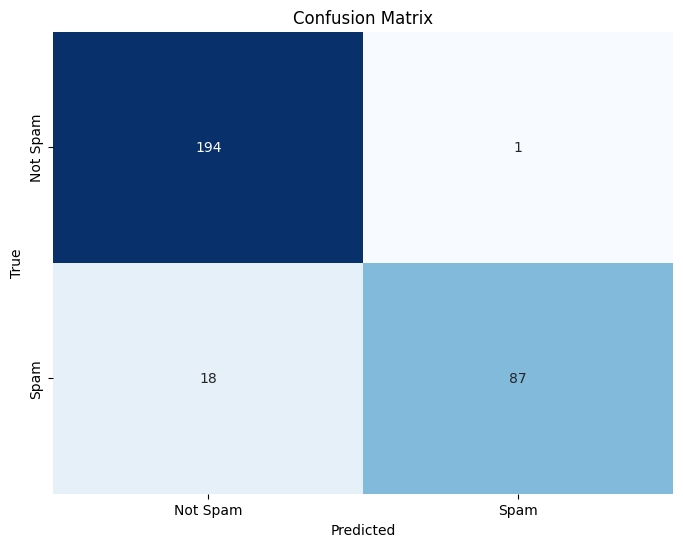

In [24]:
#CONFUSION MATRIX
cm = confusion_matrix(result_df['true_label'], result_df['predicted_label'])

# Evaluate overall performance
# print("Confusion Matrix:\n",cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       195
           1       0.99      0.83      0.90       105

    accuracy                           0.94       300
   macro avg       0.95      0.91      0.93       300
weighted avg       0.94      0.94      0.94       300



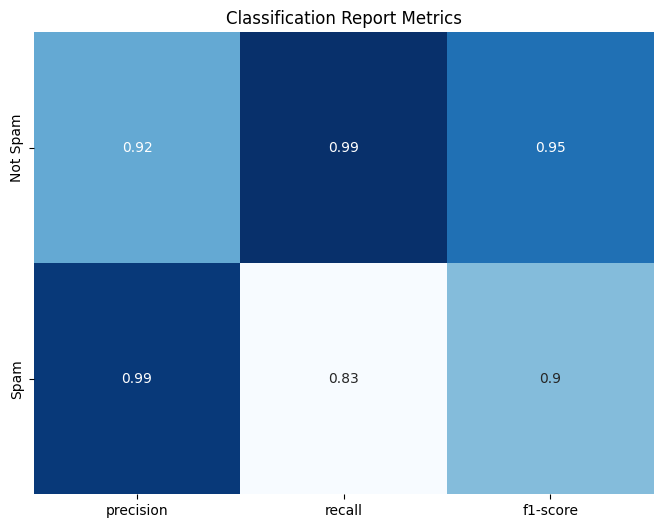

In [25]:
#CLASSIFICATION REPORT
print(classification_report(result_df['true_label'], result_df['predicted_label']))

# Also, replace target_names with the actual class names in your dataset
target_names = ['Not Spam', 'Spam']

# Example classification report
report = classification_report(result_df['true_label'], result_df['predicted_label'], target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame for visualization
df_report = pd.DataFrame(report).transpose()

# Exclude 'weighted avg' and 'macro avg' rows
df_report = df_report[~df_report.index.isin(['weighted avg', 'macro avg', 'accuracy'])]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Metrics')
plt.show()


### $4.4$ Train-test split with SMOTE oversampling, `TF-IDF` vectorizer and `Multinomial Naive Bayes` classifier.


In [26]:
# Initialize the model
model = MultinomialNB()

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Read the dataset in chunks
chunks = pd.read_csv(dataset_file, chunksize=chunk_size)


# Iterate over chunks
for chunk in chunks:
    # Shuffle the current chunk
    chunk = chunk.sample(frac=1)

    # Apply TF-IDF Vectorizer on the current chunk using the fitted vectorizer
    X_tfidf_chunk = tfidf.transform(chunk['text']).toarray()

    # Split the chunk into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf_chunk, chunk['spam'], test_size=0.3, random_state=68)

    # Check the distribution of classes in y_train
    print(pd.Series(y_train).value_counts())

    # Apply SMOTE only if there are more than one class in y_train
    if len(set(y_train)) > 1:
        # Apply SMOTE oversampling
        sm = SMOTE(random_state=42)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

        # Train the model on the current chunk with oversampled data
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate and store the results
        result_chunk = pd.DataFrame({
            'true_label': y_test,
            'predicted_label': y_pred
        })
        result_df = pd.concat([result_df, result_chunk], ignore_index=True)

spam
1    700
Name: count, dtype: int64
spam
0    433
1    267
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    700
Name: count, dtype: int64
spam
0    509
Name: count, dtype: int64


In [27]:
#ACCURACY SCORE
print("Accuracy Score for TF-IDF Vectorizer and MultinomialNB classifier:",accuracy_score(result_df['true_label'], result_df['predicted_label']))

Accuracy Score for TF-IDF Vectorizer and MultinomialNB classifier: 0.9633333333333334


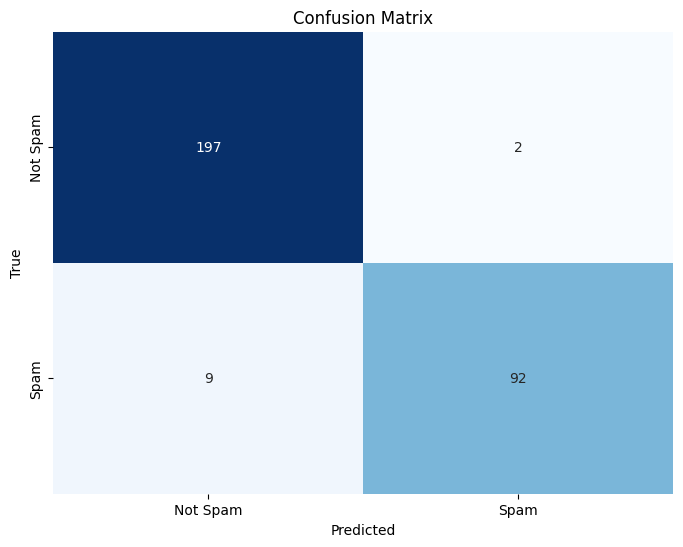

In [28]:
#CONFUSION MATRIX
cm = confusion_matrix(result_df['true_label'], result_df['predicted_label'])

# Evaluate overall performance
# print("Confusion Matrix:\n",cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       199
           1       0.98      0.91      0.94       101

    accuracy                           0.96       300
   macro avg       0.97      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



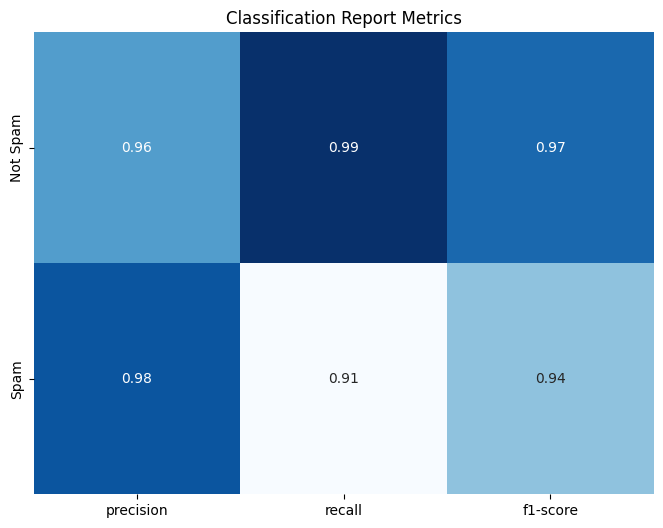

In [29]:
#CLASSIFICATION REPORT
print(classification_report(result_df['true_label'], result_df['predicted_label']))

# Also, replace target_names with the actual class names in your dataset
target_names = ['Not Spam', 'Spam']

# Example classification report
report = classification_report(result_df['true_label'], result_df['predicted_label'], target_names=target_names, output_dict=True)

# Convert the classification report to a DataFrame for visualization
df_report = pd.DataFrame(report).transpose()

# Exclude 'weighted avg' and 'macro avg' rows
df_report = df_report[~df_report.index.isin(['weighted avg', 'macro avg', 'accuracy'])]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report Metrics')
plt.show()

## Model Comparision

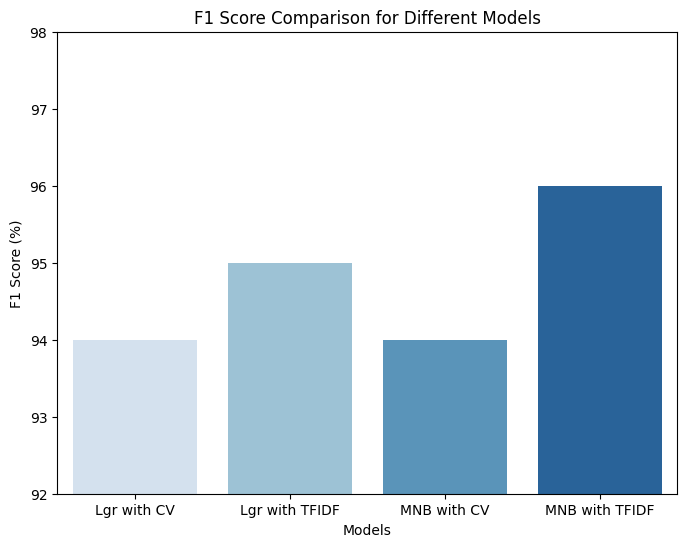

In [32]:
model_names = ['Lgr with CV', 'Lgr with TFIDF', 'MNB with CV', 'MNB with TFIDF']
model_f1 = [94,95,94,96]

# Create a DataFrame
data = {'Model': model_names, 'F1 Score': model_f1}
data = pd.DataFrame(data)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1 Score', data=data, palette='Blues')
plt.title('F1 Score Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.ylim(92, 98)  # Set the y-axis limit to match percentage scale
plt.show()

### Process (Step-by-step analysis)
1. Importing the dataset
2. Independent and Dependent feartures
3. Cleaning the data 
    i) Stemming 
    ii) Stopwords
4. Dividing the data into chunks
5. Model creation 
6. Train-test split the data
7. Apply SMOTE to deal with data imbalance
8. Fit the data
9. Prediction of the dataset
10. Performance metrics and Accuracy score.